In [144]:
import os
import sys
import pathlib
import importlib
import pandas as pd
import numpy as np


In [145]:
projectCodePath = os.path.join(pathlib.Path.cwd(),'code')
sys.path.append(projectCodePath)
import data_preparation as dataprep
import utils

### Exploratory Review and Prep of `tn.movie_budgets.csv`
* Note that this file is located in project root folder `./`
* Data folder `./data`; code folder - `./code`; zipped data folder - `./zippedData`; config folder - `./config`

In [218]:
### LOAD Config
importlib.reload(utils)
user_config = "./config/user_config.json"
json_config = "./config/config.json"
if os.path.exists(user_config):
    utils.convert_user_config_to_json(user_config)
config = utils.load_json_config_from_file(json_config)

In [22]:
df = pd.read_csv('./data/tn.movie_budgets.csv',
                 sep      = ',',
                 header   = 0,
                 encoding = 'utf-8',
                 engine   = 'python',
                 quotechar= '"',
                 quoting  = 0)   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [23]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [24]:
print(df.release_date.apply(lambda d: int(d[-4:])).min())
print(df.release_date.apply(lambda d: int(d[-4:])).max())

1915
2020


In [25]:
df.loc[df.release_date.apply(lambda d: np.uint16(d[-4:]))==1915]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5677,78,"Feb 8, 1915",The Birth of a Nation,"$110,000","$10,000,000","$11,000,000"


In [26]:
df.loc[df['domestic_gross'].apply(lambda d: not d.startswith('$'))]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [27]:
df.loc[df['worldwide_gross'].apply(lambda d: not d.startswith('$'))]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [28]:
importlib.reload(dataprep)
dataprep.prepare_clean_data(config)

In [29]:
df = pd.read_csv('./data/clean.tn.movie_budgets.csv',
                 sep      = ',',
                 header   = 0,
                 encoding = 'utf-8',
                 engine   = 'python',
                 quotechar= '"',
                 quoting  = 0) 

In [30]:
df.head()

,title,year,domestic_gross,foreign_gross
0,Pirates of the Caribbean: On Stranger Tides,2011,241063875,804600000
1,Dark Phoenix,2019,42762350,107000000
2,Avengers: Age of Ultron,2015,459005868,944008095
3,Star Wars Ep. VIII: The Last Jedi,2017,620181382,696540365
4,Star Wars Ep. VII: The Force Awakens,2015,936662225,1116648995


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2191 non-null   object
 1   year            2191 non-null   int64 
 2   domestic_gross  2191 non-null   int64 
 3   foreign_gross   2191 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 68.6+ KB


In [32]:
importlib.reload(dataprep)
dataprep.prepare_clean_data(config)

In [33]:
dfB = dataprep.load_clean_bom_movie_gross(config)
dfT = dataprep.load_clean_tn_movie_gross(config)

In [34]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   object
 1   year            3387 non-null   uint16
 2   domestic_gross  3387 non-null   uint64
 3   foreign_gross   3387 non-null   uint64
dtypes: object(1), uint16(1), uint64(2)
memory usage: 86.1+ KB


In [35]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2191 non-null   object
 1   year            2191 non-null   int64 
 2   domestic_gross  2191 non-null   uint64
 3   foreign_gross   2191 non-null   uint64
dtypes: int64(1), object(1), uint64(2)
memory usage: 68.6+ KB


In [36]:
importlib.reload(dataprep)
dfRevenue = dataprep.combine_clean_bom_and_tn_revenue_data(config)
dfRevenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4306 entries, 0 to 4305
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           4306 non-null   object
 1   year            4306 non-null   uint16
 2   domestic_gross  4306 non-null   uint64
 3   foreign_gross   4306 non-null   uint64
dtypes: object(1), uint16(1), uint64(2)
memory usage: 143.0+ KB


In [37]:
dfRevenue.head(25)

,title,year,domestic_gross,foreign_gross
0,#HORROR,2015,0,0
1,'71,2015,1300000,355000
2,"1,000 TIMES GOOD NIGHT",2014,53900,0
3,10 CLOVERFIELD LANE,2016,72100000,38100000
4,10 DAYS IN A MADHOUSE,2015,14616,0
5,10 YEARS,2012,203000,0
6,1001 GRAMS,2015,11000,0
7,102 NOT OUT,2018,1300000,10900000
8,11-11-11,2011,32800,5700000
9,12 STRONG,2018,45819713,25298665


In [93]:
importlib.reload(dataprep)
dataprep.merge_clean_data(config)
dfMerge = dataprep.load_merged_clean_data(config)
dfMerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108629 entries, 0 to 108628
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           108629 non-null  object 
 1   title            108629 non-null  object 
 2   year             108629 non-null  uint16 
 3   runtime_minutes  108629 non-null  uint16 
 4   genres           108629 non-null  object 
 5   rating           27962 non-null   float16
 6   numvotes         27962 non-null   float32
 7   domestic_gross   4181 non-null    float64
 8   foreign_gross    4181 non-null    float64
dtypes: float16(1), float32(1), float64(2), object(3), uint16(2)
memory usage: 5.2+ MB


In [206]:
dfMerge

,tconst,title,year,runtime_minutes,genres,rating,numvotes,domestic_gross,foreign_gross
0,tt0063540,SUNGHURSH,2013,175,"Action,Crime,Drama",NaN,NaN,NaN,NaN
1,tt0066787,ONE DAY BEFORE THE RAINY SEASON,2019,114,"Biography,Drama",NaN,NaN,NaN,NaN
2,tt0069049,THE OTHER SIDE OF THE WIND,2018,122,Drama,6.898438,4517.0,NaN,NaN
3,tt0100275,THE WANDERING SOAP OPERA,2017,80,"Comedy,Drama,Fantasy",6.500000,119.0,NaN,NaN
4,tt0111414,A THIN LIFE,2018,75,Comedy,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
108624,tt9916160,DRØMMELAND,2019,72,Documentary,NaN,NaN,NaN,NaN
108625,tt9916170,THE REHEARSAL,2019,51,Drama,NaN,NaN,NaN,NaN
108626,tt9916186,ILLENAU - DIE GESCHICHTE EINER EHEMALIGEN HEIL...,2017,84,Documentary,NaN,NaN,NaN,NaN
108627,tt9916190,SAFEGUARD,2019,90,"Drama,Thriller",NaN,NaN,NaN,NaN


In [221]:
dfMerge.loc[dfMerge['genres']=='Comedy,History,Musical']

,tconst,title,year,runtime_minutes,genres,rating,numvotes,domestic_gross,foreign_gross
85268,tt6395628,FIREBRINGER,2016,134,"Comedy,History,Musical",8.296875,172.0,NaN,NaN


In [216]:
msk = (dfMerge['rating'].apply(lambda d: not np.isnan(d)))
dfMerge.loc[msk].groupby('genres')[['rating','numvotes']].agg('sum','sum')

,rating,numvotes
genres,,
Action,1466.000000,306894.0
"Action,Adventure",199.375000,108135.0
"Action,Adventure,Animation",789.500000,3568717.0
"Action,Adventure,Biography",86.187500,999440.0
"Action,Adventure,Comedy",848.000000,7254130.0
...,...,...
Thriller,2782.000000,408548.0
"Thriller,War",6.101562,7054.0
"Thriller,Western",12.593750,13222.0


In [95]:
df = dfMerge
dfD = df.loc[(np.isnan(df['domestic_gross'])==False), ['tconst','title','year','genres','domestic_gross']]
dfF = df.loc[(np.isnan(df['foreign_gross'])==False),  ['tconst','title','year','genres','foreign_gross']]
dfD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4181 entries, 16 to 108596
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          4181 non-null   object 
 1   title           4181 non-null   object 
 2   year            4181 non-null   uint16 
 3   genres          4181 non-null   object 
 4   domestic_gross  4181 non-null   float64
dtypes: float64(1), object(3), uint16(1)
memory usage: 171.5+ KB


In [98]:
srsTop10D=dfD.groupby('genres')['domestic_gross'].sum().sort_values(ascending=False).iloc[range(10)]
srsTop10F=dfF.groupby('genres')['foreign_gross'].sum().sort_values(ascending=False).iloc[range(10)]
srsTop20D=dfD.groupby('genres')['domestic_gross'].sum().sort_values(ascending=False).iloc[range(20)]
srsTop20F=dfF.groupby('genres')['foreign_gross'].sum().sort_values(ascending=False).iloc[range(20)]

In [99]:
srsTop20D/1e9

genres
Action,Adventure,Sci-Fi       12.701588
Adventure,Animation,Comedy    10.190424
Action,Adventure,Fantasy       4.996404
Drama                          4.753658
Documentary                    4.077531
Action,Adventure,Comedy        3.813763
Comedy                         3.105132
Action,Adventure,Animation     2.989080
Comedy,Romance                 2.312398
Comedy,Drama                   2.078635
Action,Comedy,Crime            2.052224
Action,Adventure,Thriller      2.002339
Action,Adventure,Drama         1.959900
Comedy,Drama,Romance           1.953485
Adventure,Family,Fantasy       1.930973
Horror,Mystery,Thriller        1.802860
Drama,Romance                  1.760306
Action,Crime,Thriller          1.755013
Action,Thriller                1.377953
Biography,Drama,History        1.304297
Name: domestic_gross, dtype: float64

In [59]:
import matplotlib.pyplot as plt
matplotlib.__version__

'3.5.1'

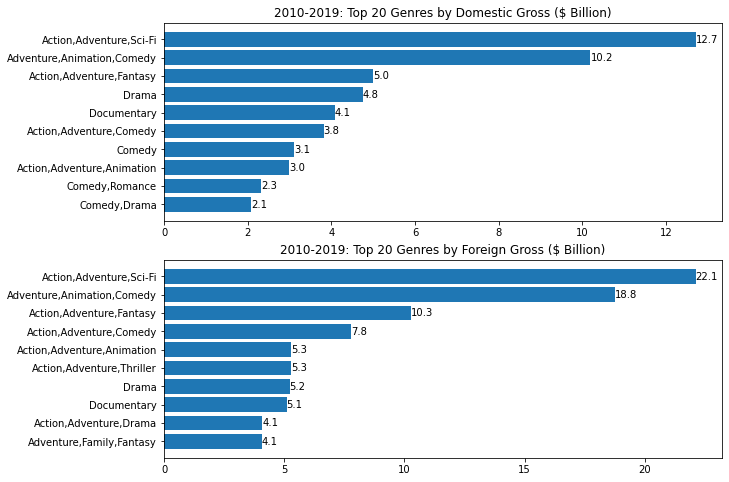

In [129]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8))
p0=ax[0].barh(srsTop10D.index, srsTop10D.div(1e9).values)
ax[0].invert_yaxis()
ax[0].bar_label(p0,label_type='edge',fmt='%.1f')
#p1=ax[1].bar(srsForTop20.index, srsDomTop20.values/1e9)
ax[0].set_title('2010-2019: Top 20 Genres by Domestic Gross ($ Billion)')

p1=ax[1].barh(srsTop10F.index, srsTop10F.div(1e9).values)
ax[1].invert_yaxis()
ax[1].bar_label(p1,label_type='edge',fmt='%.1f')
ax[1].set_title('2010-2019: Top 20 Genres by Foreign Gross ($ Billion)')

plt.show();

In [132]:
import data_visualization as dataviz

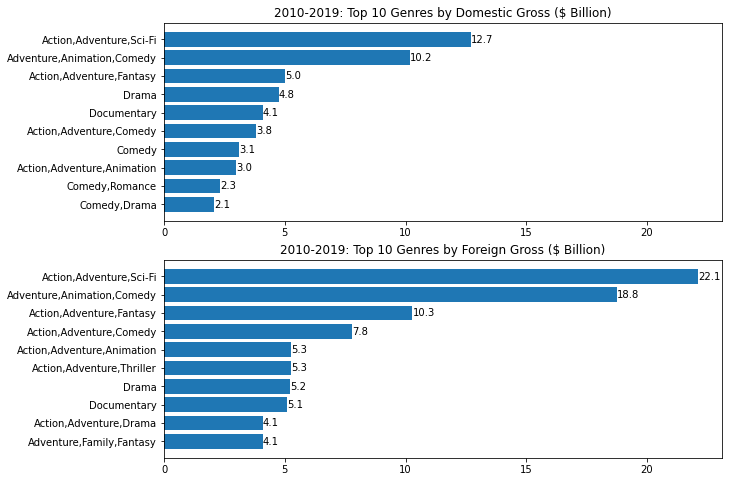

In [191]:
importlib.reload(dataviz)
dataviz.bar_chart_top_genres_by_revenue(config)

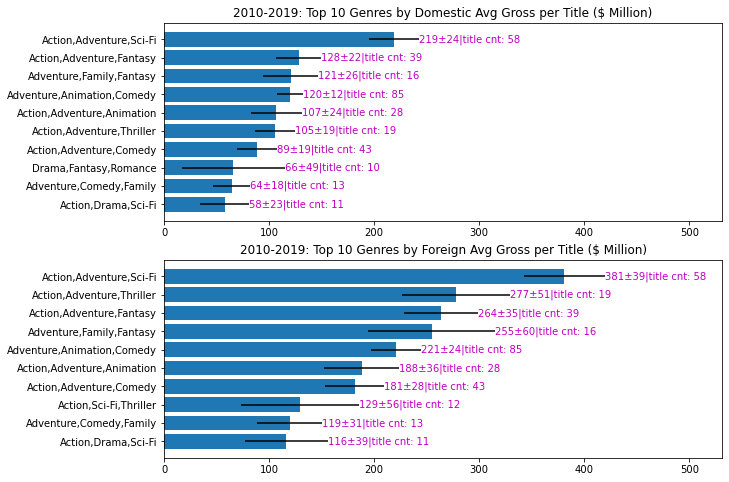

In [326]:
importlib.reload(dataviz)
dataviz.bar_chart_top_genres_by_avgrevenue_pertitle(config)

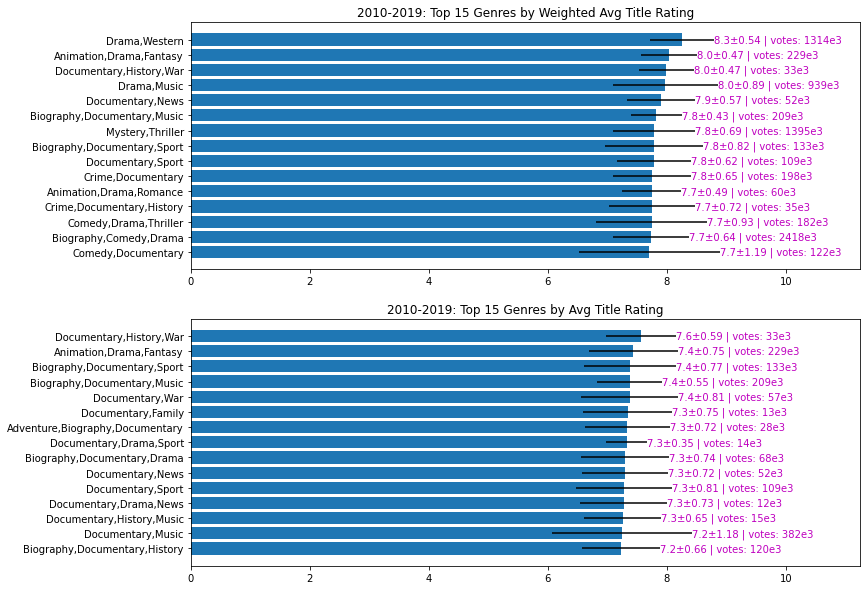

In [327]:
importlib.reload(dataviz)
dataviz.bar_chart_top_genres_by_weightedavg_title_rating(config)

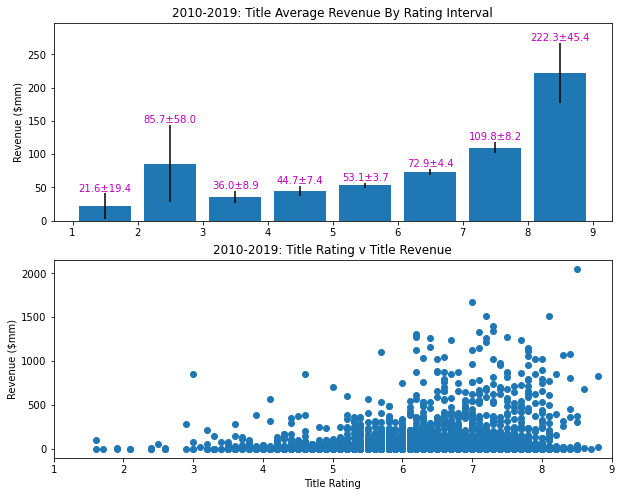

In [339]:
importlib.reload(dataviz)
dataviz.barchart_scatterplot_title_rating_and_revenue(config)

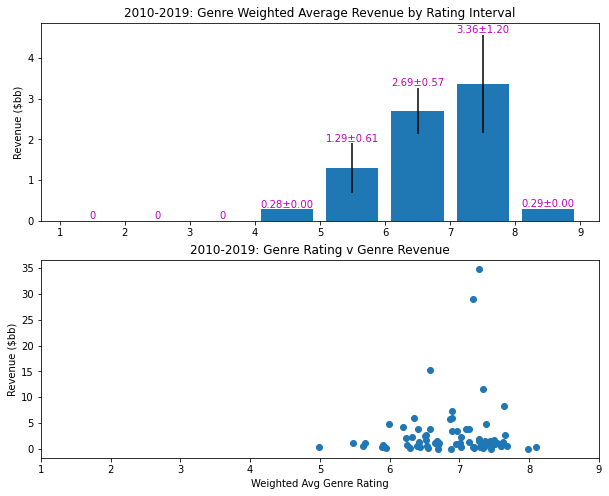

In [340]:
importlib.reload(dataviz)
dataviz.barchart_scatterplot_genre_rating_and_revenue(config)